In [1104]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.api as sm
from scipy.stats import boxcox
import pickle 
import json

# Problem Statement 

# Data Gathering 

In [1105]:
df=pd.read_csv(r"D:\DATA SCIENCE ALL DATA VELOCITY\PRESONAL_WORKS\Linear  Regression class\Student_performance_Data.csv")
df

StudentID       Name  Gender  AttendanceRate  StudyHoursPerWeek  \
0           1       John    Male              85                 15   
1           2      Sarah  Female              90                 20   
2           3       Alex    Male              78                 10   
3           4    Michael    Male              92                 25   
4           5       Emma  Female              88                 18   
5           6     Olivia  Female              95                 30   
6           7     Daniel    Male              70                  8   
7           8     Sophia  Female              85                 17   
8           9      James    Male              82                 12   
9          10   Isabella  Female              91                 22   
10         11        Mia  Female              87                 16   
11         12      Ethan    Male              76                  9   
12         13        Ava  Female              94                 28   
13         14      Lucas    Male              81                 14   
14         15       Ella  Female              89                 21   
15         16       Noah    Male              83                 12   
16         17       Lily  Female              92                 26   
17         18       Liam    Male              75                 10   
18         19      Chloe  Female              88                 19   
19         20      Mason    Male              84                 13   
20         21     Harper  Female              90                 22   
21         22     Carter    Male              71                  7   
22         23      Grace  Female              87                 18   
23         24       Jack    Male              93                 27   
24         25      Layla  Female              85                 15   
25         26   Benjamin    Male              79                 12   
26         27        Zoe  Female              89                 20   
27         28      Henry    Male              80                 14   
28         29    Lillian  Female              86                 17   
29         30     Elijah    Male              82                 10   
30         31     Amelia  Female              91                 23   
31         32      Isaac    Male              77                  9   
32         33       Aria  Female              88                 21   
33         34      Dylan    Male              84                 13   
34         35     Hannah  Female              87                 19   
35         36      Caleb    Male              80                 12   
36         37   Scarlett  Female              92                 25   
37         38    Matthew    Male              73                  8   
38         39      Emily  Female              89                 22   
39         40      Wyatt    Male              81                 13   
40         41       Nora  Female              85                 18   
41         42     Oliver    Male              77                 10   
42         43      Hazel  Female              91                 26   
43         44  Sebastian    Male              88                 20   
44         45     Violet  Female              84                 15   
45         46       Levi    Male              82                 11   
46         47       Lucy  Female              93                 24   
47         48    Gabriel    Male              79                 13   
48         49      Ellie  Female              90                 22   
49         50       Owen    Male              75                  9   
50         51      Sadie  Female              87                 18   
51         52    Jackson    Male              83                 13   
52         53       Mila  Female              90                 21   
53         54      David    Male              78                 12   
54         55   Penelope  Female              88                 19   
55         56     Nathan    

# Expolatory Data Analysis And Feature Enginnering

In [1106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  60 non-null     int64 
 1   Name                       60 non-null     object
 2   Gender                     60 non-null     object
 3   AttendanceRate             60 non-null     int64 
 4   StudyHoursPerWeek          60 non-null     int64 
 5   PreviousGrade              60 non-null     int64 
 6   ExtracurricularActivities  60 non-null     int64 
 7   ParentalSupport            60 non-null     object
 8   FinalGrade                 60 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 4.3+ KB


In [1107]:
df.describe()

StudentID  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
count  60.000000       60.000000          60.000000      60.000000   
mean   30.500000       84.716667          16.750000      78.266667   
std    17.464249        6.106656           5.812392       8.113322   
min     1.000000       70.000000           7.000000      60.000000   
25%    15.750000       80.750000          12.000000      72.750000   
50%    30.500000       85.500000          16.500000      79.500000   
75%    45.250000       89.250000          21.000000      85.000000   
max    60.000000       95.000000          30.000000      91.000000   

       ExtracurricularActivities  FinalGrade  
count                  60.000000   60.000000  
mean                    1.516667   80.816667  
std                     1.065510    8.143817  
min                     0.000000   62.000000  
25%                     1.000000   74.750000  
50%                     2.000000   82.000000  
75%                     2.000000   87.250000  
max                     3.000000   94.000000

In [1108]:
df.isnull().sum()

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

In [1109]:
df.duplicated().sum()

0

In [1110]:
df["Gender"].value_counts().to_dict()

{'Male': 30, 'Female': 30}

In [1111]:
df["Gender"]=df["Gender"].replace({'Male': 1, 'Female': 0})

In [1112]:
df["ParentalSupport"].value_counts().to_dict()

{'Medium': 24, 'High': 21, 'Low': 15}

In [1113]:
df["ParentalSupport"]=df["ParentalSupport"].replace({'High':2,'Medium':1, 'Low':0})

<Axes: xlabel='Gender', ylabel='count'>

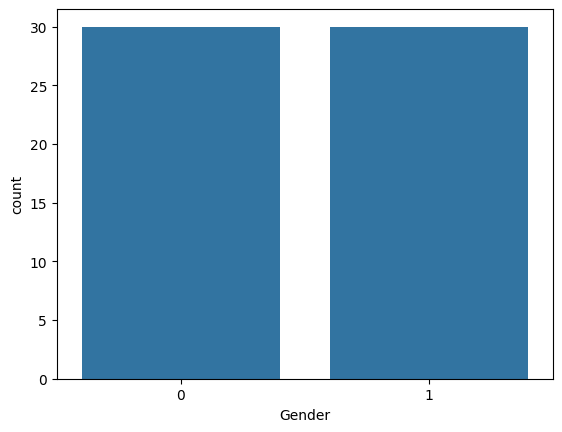

In [1114]:
sns.countplot(x='Gender', data=df)

In [1115]:
df["Gender"].skew()

0.0

<Axes: ylabel='AttendanceRate'>

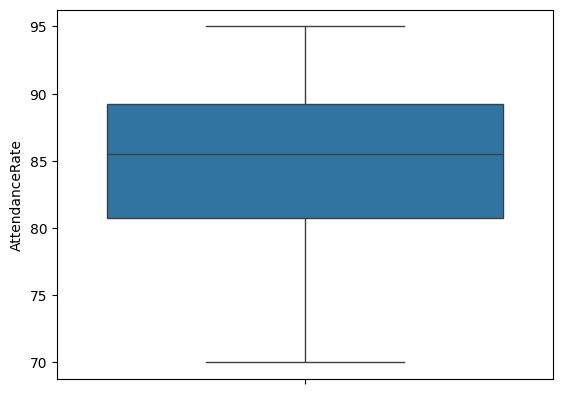

In [1116]:
sns.boxplot(df["AttendanceRate"])

<Axes: xlabel='AttendanceRate', ylabel='Density'>

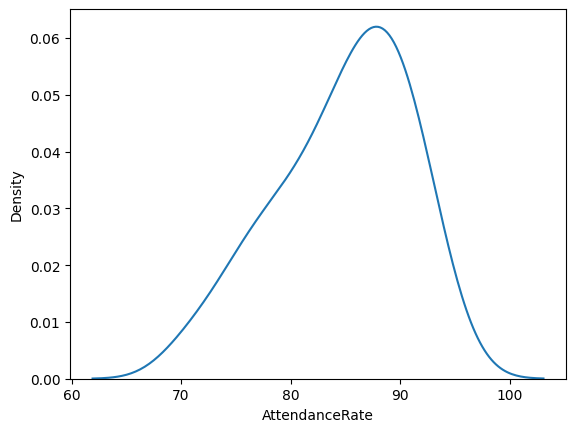

In [1117]:
sns.kdeplot(df["AttendanceRate"])

<Axes: xlabel='AttendanceRate', ylabel='Count'>

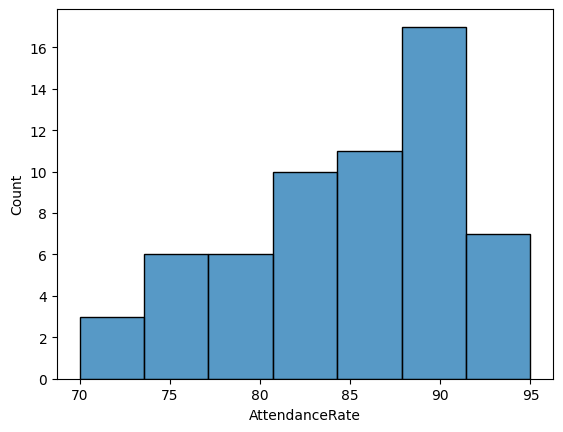

In [1118]:
sns.histplot(df["AttendanceRate"])

In [1119]:
df["AttendanceRate"].skew()

-0.5483163320997342

In [1120]:
# from sklearn.preprocessing import PowerTransformer
# Power_trans=PowerTransformer()
# df['AttendanceRate']= Power_trans.fit_transform(df[['AttendanceRate']])[:,0]
# AttendanceRate_lambda=Power_trans.lambdas_

In [1025]:
# from sklearn.preprocessing import PowerTransformer
# Power_trans=PowerTransformer(method="box-cox")
# df['AttendanceRate']= Power_trans.fit_transform(df[['AttendanceRate']])[:,0]
# AttendanceRate_lambda=Power_trans.lambdas_

In [1100]:
df['AttendanceRate']=np.log(df['AttendanceRate'])
df['AttendanceRate']

0     4.442651
1     4.499810
2     4.356709
3     4.521789
4     4.477337
5     4.553877
6     4.248495
7     4.442651
8     4.406719
9     4.510860
10    4.465908
11    4.330733
12    4.543295
13    4.394449
14    4.488636
15    4.418841
16    4.521789
17    4.317488
18    4.477337
19    4.430817
20    4.499810
21    4.262680
22    4.465908
23    4.532599
24    4.442651
25    4.369448
26    4.488636
27    4.382027
28    4.454347
29    4.406719
30    4.510860
31    4.343805
32    4.477337
33    4.430817
34    4.465908
35    4.382027
36    4.521789
37    4.290459
38    4.488636
39    4.394449
40    4.442651
41    4.343805
42    4.510860
43    4.477337
44    4.430817
45    4.406719
46    4.532599
47    4.369448
48    4.499810
49    4.317488
50    4.465908
51    4.418841
52    4.499810
53    4.356709
54    4.477337
55    4.454347
56    4.510860
57    4.304065
58    4.442651
59    4.477337
Name: AttendanceRate, dtype: float64

<Axes: xlabel='AttendanceRate', ylabel='Density'>

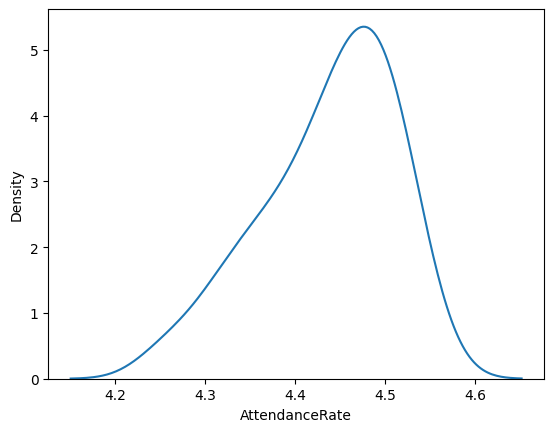

In [1101]:
sns.kdeplot(df["AttendanceRate"])

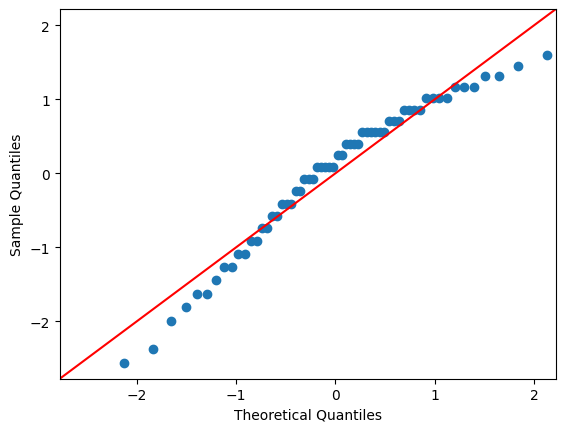

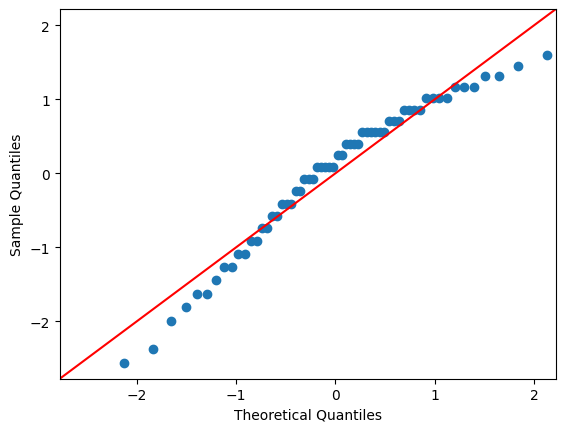

In [1102]:
sm.qqplot(df["AttendanceRate"],line="45",fit=True)

In [1121]:
df['AttendanceRate']=np.sqrt(df['AttendanceRate'])
df['AttendanceRate']

0     9.219544
1     9.486833
2     8.831761
3     9.591663
4     9.380832
5     9.746794
6     8.366600
7     9.219544
8     9.055385
9     9.539392
10    9.327379
11    8.717798
12    9.695360
13    9.000000
14    9.433981
15    9.110434
16    9.591663
17    8.660254
18    9.380832
19    9.165151
20    9.486833
21    8.426150
22    9.327379
23    9.643651
24    9.219544
25    8.888194
26    9.433981
27    8.944272
28    9.273618
29    9.055385
30    9.539392
31    8.774964
32    9.380832
33    9.165151
34    9.327379
35    8.944272
36    9.591663
37    8.544004
38    9.433981
39    9.000000
40    9.219544
41    8.774964
42    9.539392
43    9.380832
44    9.165151
45    9.055385
46    9.643651
47    8.888194
48    9.486833
49    8.660254
50    9.327379
51    9.110434
52    9.486833
53    8.831761
54    9.380832
55    9.273618
56    9.539392
57    8.602325
58    9.219544
59    9.380832
Name: AttendanceRate, dtype: float64

<Axes: xlabel='AttendanceRate', ylabel='Density'>

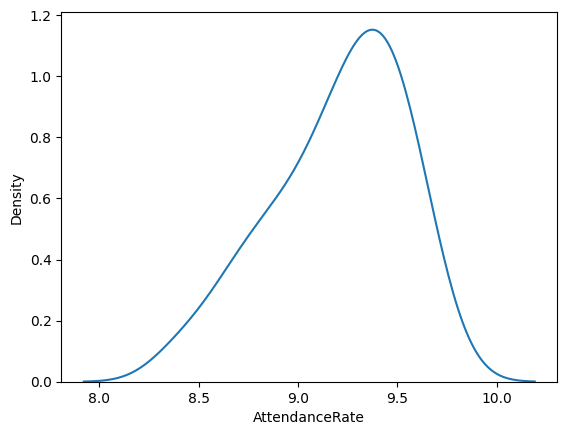

In [1046]:
sns.kdeplot(df["AttendanceRate"])

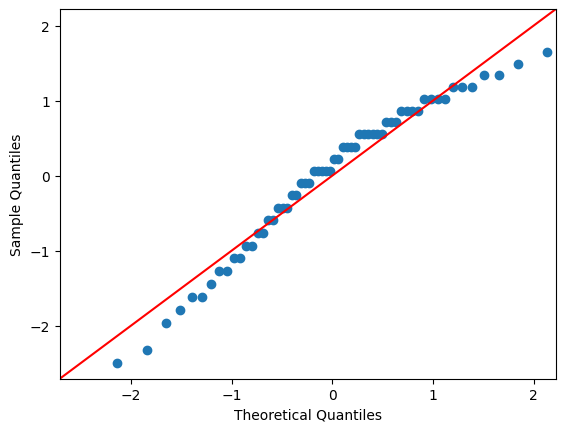

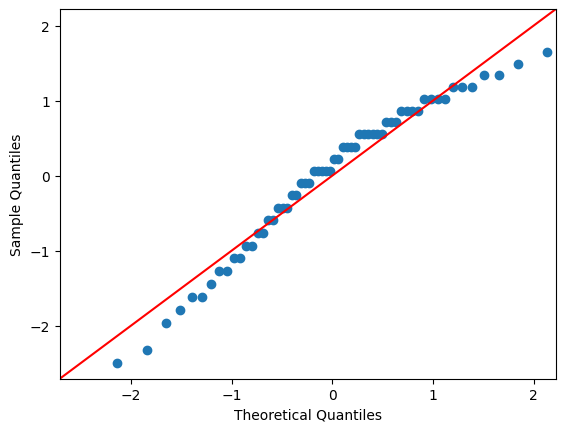

In [1048]:
sm.qqplot(df["AttendanceRate"],line="45",fit=True)

In [1064]:
df['AttendanceRate']=np.cbrt(df['AttendanceRate'])
df['AttendanceRate']

0     4.396830
1     4.481405
2     4.272659
3     4.514357
4     4.447960
5     4.562903
6     4.121285
7     4.396830
8     4.344481
9     4.497941
10    4.431048
11    4.235824
12    4.546836
13    4.326749
14    4.464745
15    4.362071
16    4.514357
17    4.217163
18    4.447960
19    4.379519
20    4.481405
21    4.140818
22    4.431048
23    4.530655
24    4.396830
25    4.290840
26    4.464745
27    4.308869
28    4.414005
29    4.344481
30    4.497941
31    4.254321
32    4.447960
33    4.379519
34    4.431048
35    4.308869
36    4.514357
37    4.179339
38    4.464745
39    4.326749
40    4.396830
41    4.254321
42    4.497941
43    4.447960
44    4.379519
45    4.344481
46    4.530655
47    4.290840
48    4.481405
49    4.217163
50    4.431048
51    4.362071
52    4.481405
53    4.272659
54    4.447960
55    4.414005
56    4.497941
57    4.198336
58    4.396830
59    4.447960
Name: AttendanceRate, dtype: float64

<Axes: xlabel='AttendanceRate', ylabel='Density'>

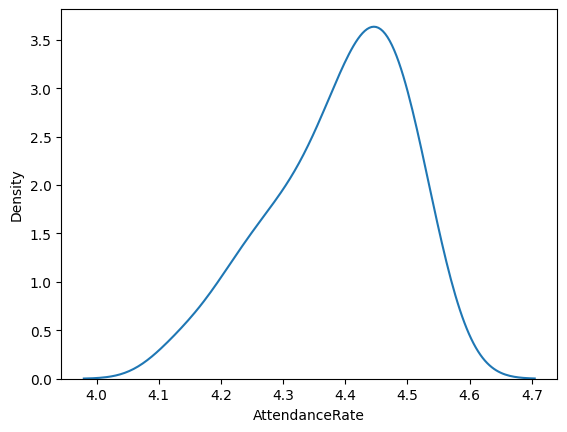

In [1065]:
sns.kdeplot(df["AttendanceRate"])

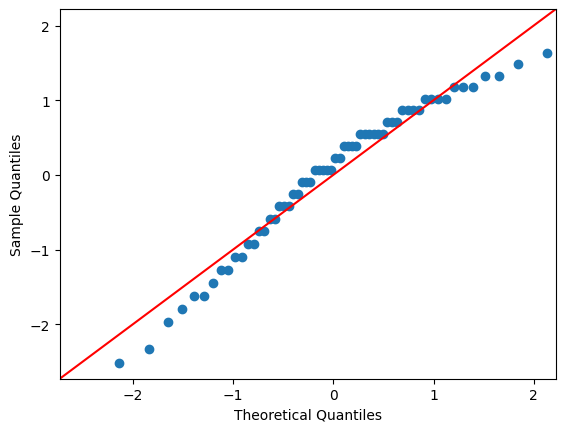

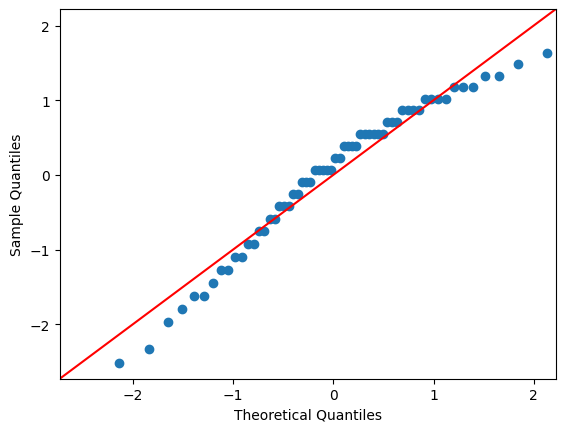

In [1066]:
sm.qqplot(df["AttendanceRate"],line="45",fit=True)

In [946]:
df['AttendanceRate']=1/(df['AttendanceRate'])
df['AttendanceRate']

0     0.011765
1     0.011111
2     0.012821
3     0.010870
4     0.011364
5     0.010526
6     0.014286
7     0.011765
8     0.012195
9     0.010989
10    0.011494
11    0.013158
12    0.010638
13    0.012346
14    0.011236
15    0.012048
16    0.010870
17    0.013333
18    0.011364
19    0.011905
20    0.011111
21    0.014085
22    0.011494
23    0.010753
24    0.011765
25    0.012658
26    0.011236
27    0.012500
28    0.011628
29    0.012195
30    0.010989
31    0.012987
32    0.011364
33    0.011905
34    0.011494
35    0.012500
36    0.010870
37    0.013699
38    0.011236
39    0.012346
40    0.011765
41    0.012987
42    0.010989
43    0.011364
44    0.011905
45    0.012195
46    0.010753
47    0.012658
48    0.011111
49    0.013333
50    0.011494
51    0.012048
52    0.011111
53    0.012821
54    0.011364
55    0.011628
56    0.010989
57    0.013514
58    0.011765
59    0.011364
Name: AttendanceRate, dtype: float64

<Axes: xlabel='AttendanceRate', ylabel='Density'>

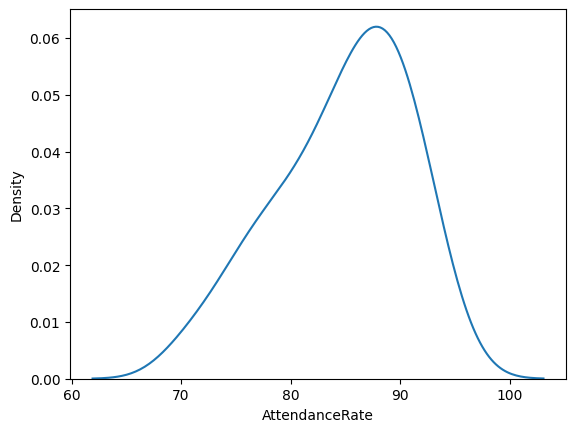

In [1083]:
sns.kdeplot(df["AttendanceRate"])

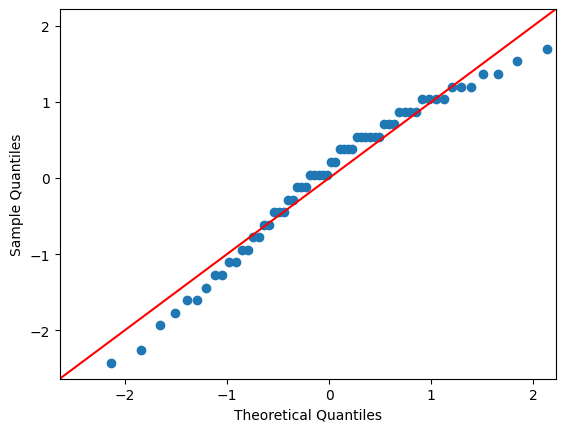

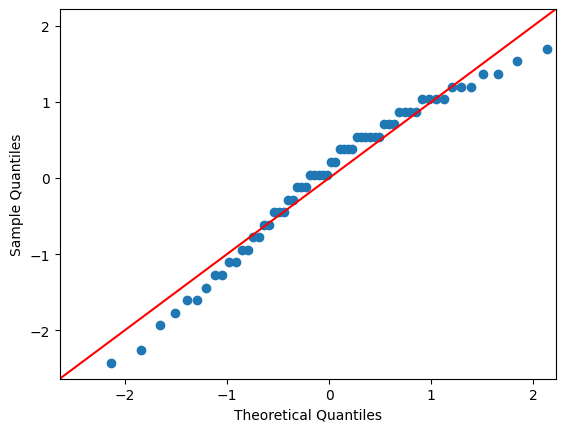

In [1084]:
sm.qqplot(df["AttendanceRate"],line="45",fit=True)

<Axes: xlabel='FinalGrade', ylabel='Density'>

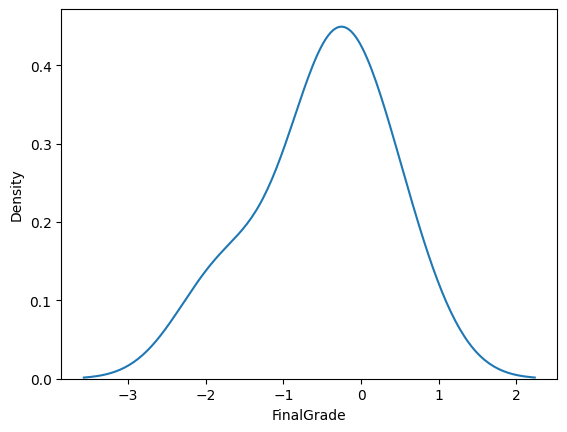

In [947]:
sns.kdeplot(array)

In [948]:
pd.Series(array).skew()

-0.9893968143073917

<Axes: ylabel='StudyHoursPerWeek'>

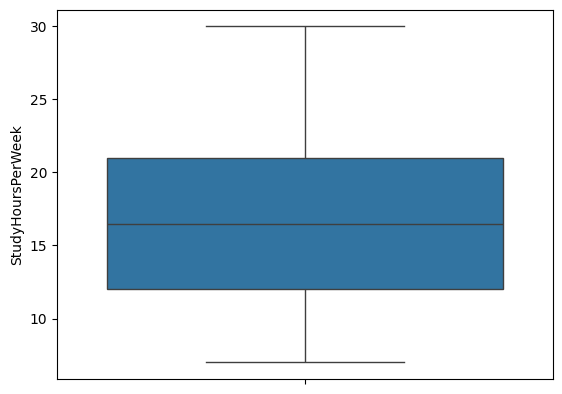

In [1122]:
sns.boxplot(df["StudyHoursPerWeek"])

<Axes: xlabel='StudyHoursPerWeek', ylabel='Density'>

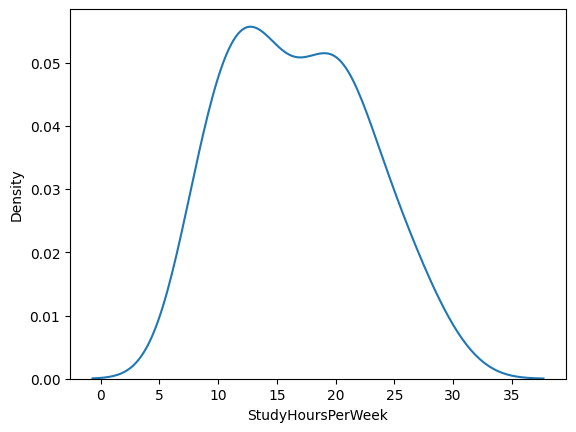

In [1123]:
sns.kdeplot(df["StudyHoursPerWeek"])

<Axes: xlabel='StudyHoursPerWeek', ylabel='Count'>

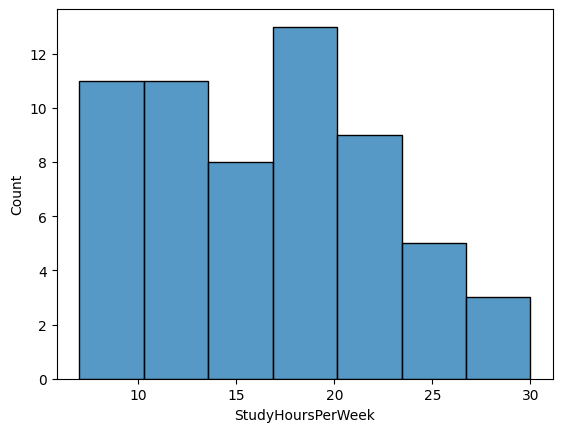

In [1124]:
sns.histplot(df["StudyHoursPerWeek"])

In [1125]:
df["StudyHoursPerWeek"].skew()

0.2645574117095422

<Axes: ylabel='PreviousGrade'>

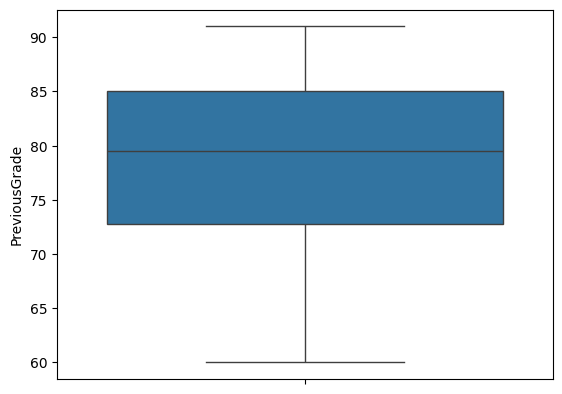

In [1126]:
sns.boxplot(df["PreviousGrade"])

<Axes: xlabel='PreviousGrade', ylabel='Density'>

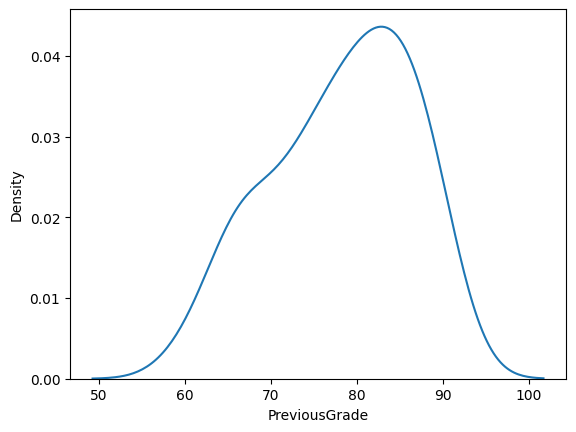

In [1127]:
sns.kdeplot(df["PreviousGrade"])

<Axes: xlabel='PreviousGrade', ylabel='Count'>

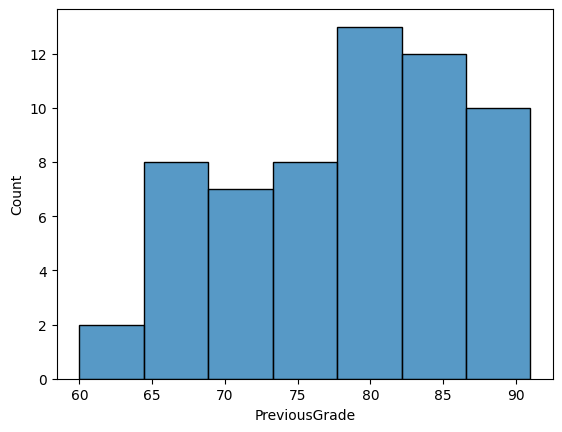

In [1128]:
sns.histplot(df["PreviousGrade"])

In [1129]:
df["PreviousGrade"].skew()

-0.40821632483408266

<Axes: ylabel='ExtracurricularActivities'>

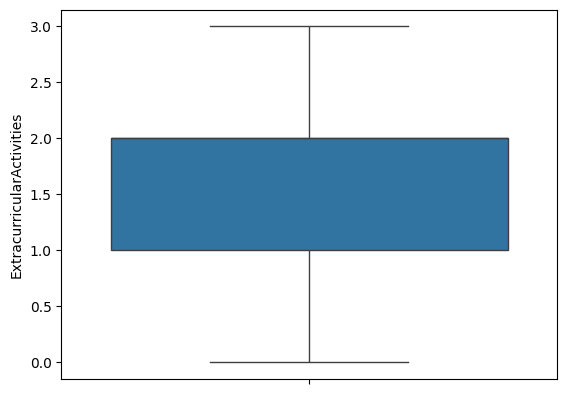

In [1130]:
sns.boxplot(df["ExtracurricularActivities"])

<Axes: xlabel='ExtracurricularActivities', ylabel='Density'>

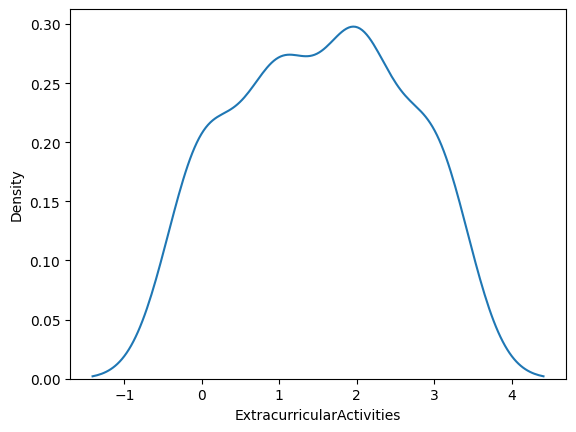

In [1131]:
sns.kdeplot(df["ExtracurricularActivities"])

<Axes: xlabel='ExtracurricularActivities', ylabel='Count'>

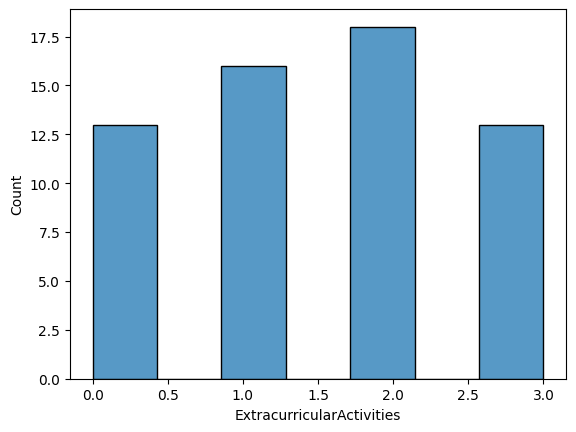

In [1132]:
sns.histplot(df["ExtracurricularActivities"])

In [1133]:
df["ExtracurricularActivities"].skew()

-0.04492447238420646

<Axes: xlabel='ParentalSupport', ylabel='count'>

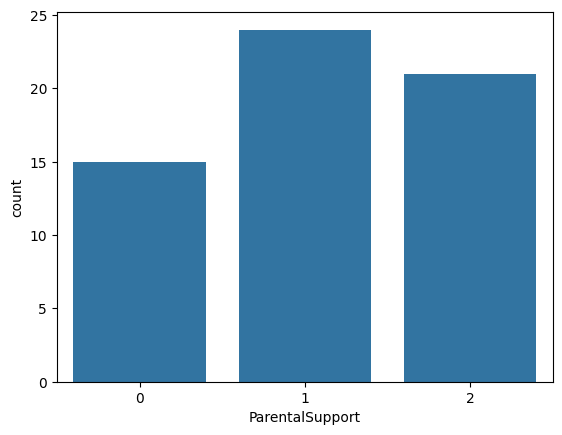

In [1134]:
sns.countplot(x='ParentalSupport', data=df)

In [1135]:
# sns.pairplot(df)

In [1136]:
pd.crosstab(df["Gender"],df["ParentalSupport"])

ParentalSupport   0   1   2
Gender                     
0                 0  13  17
1                15  11   4

In [1137]:
#IQR
q1=np.quantile(df["AttendanceRate"],0.25)
print("q1:",q1)
q3=np.quantile(df["AttendanceRate"],0.75)
print("q3:",q3)

IQR=q3-q1
print("IQR:",q3-q1)
upper_tail=q3+1.5*IQR
print("Upper_tail:",upper_tail)
lower_tail=q1-1.5*IQR
print("Lower_tail:",lower_tail)

q1: 8.98606797749979
q3: 9.447194094168736
IQR: 0.46112611666894665
Upper_tail: 10.138883269172156
Lower_tail: 8.29437880249637


In [1138]:
df[(df["AttendanceRate"]>upper_tail) |(df["AttendanceRate"]<lower_tail)]

Empty DataFrame
Columns: [StudentID, Name, Gender, AttendanceRate, StudyHoursPerWeek, PreviousGrade, ExtracurricularActivities, ParentalSupport, FinalGrade]
Index: []

In [1139]:
#IQR
q1=np.quantile(df["StudyHoursPerWeek"],0.25)
print("q1:",q1)
q3=np.quantile(df["StudyHoursPerWeek"],0.75)
print("q3:",q3)

IQR=q3-q1
print("IQR:",q3-q1)
upper_tail=q3+1.5*IQR
print("Upper_tail:",upper_tail)
lower_tail=q1-1.5*IQR
print("Lower_tail:",lower_tail)

q1: 12.0
q3: 21.0
IQR: 9.0
Upper_tail: 34.5
Lower_tail: -1.5


In [1140]:
df[(df["StudyHoursPerWeek"]>upper_tail) |(df["StudyHoursPerWeek"]<lower_tail)]

Empty DataFrame
Columns: [StudentID, Name, Gender, AttendanceRate, StudyHoursPerWeek, PreviousGrade, ExtracurricularActivities, ParentalSupport, FinalGrade]
Index: []

In [1141]:
#IQR
q1=np.quantile(df["PreviousGrade"],0.25)
print("q1:",q1)
q3=np.quantile(df["PreviousGrade"],0.75)
print("q3:",q3)

IQR=q3-q1
print("IQR:",q3-q1)
upper_tail=q3+1.5*IQR
print("Upper_tail:",upper_tail)
lower_tail=q1-1.5*IQR
print("Lower_tail:",lower_tail)

q1: 72.75
q3: 85.0
IQR: 12.25
Upper_tail: 103.375
Lower_tail: 54.375


In [1142]:
df[(df["PreviousGrade"]>upper_tail) |(df["PreviousGrade"]<lower_tail)]

Empty DataFrame
Columns: [StudentID, Name, Gender, AttendanceRate, StudyHoursPerWeek, PreviousGrade, ExtracurricularActivities, ParentalSupport, FinalGrade]
Index: []

In [1143]:
#IQR
q1=np.quantile(df["ExtracurricularActivities"],0.25)
print("q1:",q1)
q3=np.quantile(df["ExtracurricularActivities"],0.75)
print("q3:",q3)

IQR=q3-q1
print("IQR:",q3-q1)
upper_tail=q3+1.5*IQR
print("Upper_tail:",upper_tail)
lower_tail=q1-1.5*IQR
print("Lower_tail:",lower_tail)

q1: 1.0
q3: 2.0
IQR: 1.0
Upper_tail: 3.5
Lower_tail: -0.5


In [1144]:
df[(df["ExtracurricularActivities"]>upper_tail) |(df["ExtracurricularActivities"]<lower_tail)]

Empty DataFrame
Columns: [StudentID, Name, Gender, AttendanceRate, StudyHoursPerWeek, PreviousGrade, ExtracurricularActivities, ParentalSupport, FinalGrade]
Index: []

In [1145]:
#IQR
q1=np.quantile(df["ParentalSupport"],0.25)
print("q1:",q1)
q3=np.quantile(df["ParentalSupport"],0.75)
print("q3:",q3)

IQR=q3-q1
print("IQR:",q3-q1)
upper_tail=q3+1.5*IQR
print("Upper_tail:",upper_tail)
lower_tail=q1-1.5*IQR
print("Lower_tail:",lower_tail)

q1: 0.75
q3: 2.0
IQR: 1.25
Upper_tail: 3.875
Lower_tail: -1.125


In [1146]:
df[(df["ParentalSupport"]>upper_tail) |(df["ParentalSupport"]<lower_tail)]

Empty DataFrame
Columns: [StudentID, Name, Gender, AttendanceRate, StudyHoursPerWeek, PreviousGrade, ExtracurricularActivities, ParentalSupport, FinalGrade]
Index: []

In [1147]:
columns=['Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade']
def get_outliers_values(feature):
    z_score = zscore(feature)
    values_index = np.where(np.abs(z_score) > 3)
    outliers = feature.iloc[values_index]
    
    print(feature_name,"outliers:",outliers,"\n")
    
    

for feature_name in columns:
    get_outliers_values(df[feature_name])   

Gender outliers: Series([], Name: Gender, dtype: int64) 

AttendanceRate outliers: Series([], Name: AttendanceRate, dtype: float64) 

StudyHoursPerWeek outliers: Series([], Name: StudyHoursPerWeek, dtype: int64) 

PreviousGrade outliers: Series([], Name: PreviousGrade, dtype: int64) 

ExtracurricularActivities outliers: Series([], Name: ExtracurricularActivities, dtype: int64) 

ParentalSupport outliers: Series([], Name: ParentalSupport, dtype: int64) 

FinalGrade outliers: Series([], Name: FinalGrade, dtype: int64) 



# Feature Selection /Extraction

## Linearity

In [1148]:
df=df.drop(["StudentID","Name"],axis=1)

In [1149]:
df.corr().tail(1)

Gender  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
FinalGrade -0.674867        0.969472           0.938585        0.99605   

            ExtracurricularActivities  ParentalSupport  FinalGrade  
FinalGrade                   0.862727         0.878871         1.0

## Multicolinearity

In [1150]:
for i,colName in enumerate(df.columns):
    vif = variance_inflation_factor(df,i)
    print(colName, ':',vif)

Gender : 4.061233785458838
AttendanceRate : 1409.062102490975
StudyHoursPerWeek : 81.4048462899067
PreviousGrade : 12772.104290187548
ExtracurricularActivities : 13.0611048010242
ParentalSupport : 14.688782839932053
FinalGrade : 13693.658766869507


<Axes: >

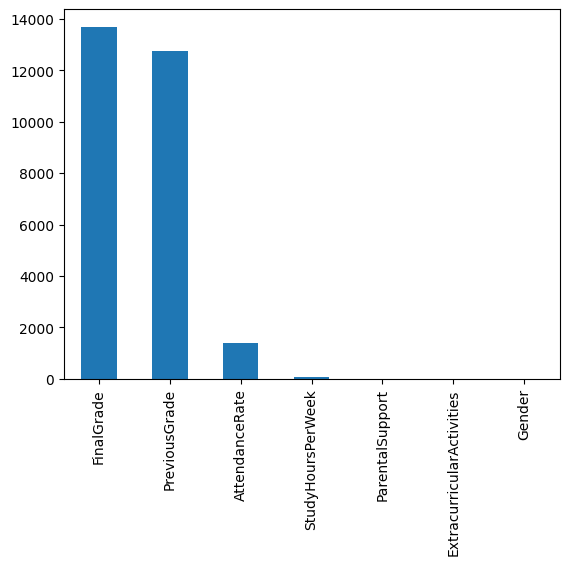

In [1151]:
vif_list = []
for i,colName in enumerate(df.columns):
    vif = variance_inflation_factor(df,i)
    vif_list.append(vif)

s1 = pd.Series(vif_list, index = df.columns)
s1.sort_values(ascending = False).plot(kind = 'bar')

In [1152]:
df[['AttendanceRate', 'PreviousGrade']].corr()

AttendanceRate  PreviousGrade
AttendanceRate        1.000000       0.966556
PreviousGrade         0.966556       1.000000

In [1153]:
df[['AttendanceRate', 'PreviousGrade',"StudyHoursPerWeek"]].corr()

AttendanceRate  PreviousGrade  StudyHoursPerWeek
AttendanceRate           1.000000       0.966556           0.937301
PreviousGrade            0.966556       1.000000           0.941663
StudyHoursPerWeek        0.937301       0.941663           1.000000

In [1154]:
# df["AddtendancePreviousStudy"]=df['AttendanceRate']*df['PreviousGrade']*df["StudyHoursPerWeek"]
# df.drop(['AttendanceRate', 'PreviousGrade',"StudyHoursPerWeek"],axis=1,inplace=True)

# Model Traning

In [1155]:
x=df.drop("FinalGrade",axis=1)
y=df["FinalGrade"]

In [1156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [1157]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [1158]:
lin_reg.coef_

array([-0.00420726,  3.53687149, -0.03363735,  0.87298082, -0.14142829,
        0.27542667])

In [1159]:
lin_reg.intercept_

-19.57302598136036

# Model Evaluation

#### Traning data Evalution

In [1160]:
y_train_pred=lin_reg.predict(x_train)
y_train_pred

array([81.02847915, 76.15646141, 79.81700422, 71.49159809, 68.06694953,
       88.6294746 , 85.41663774, 78.88198427, 88.58500834, 89.55278193,
       74.22976312, 83.63417879, 75.50385693, 90.34179888, 76.46259124,
       74.06212739, 86.2559812 , 78.34464876, 68.7390485 , 62.12410688,
       82.5363077 , 81.44139523, 82.78370643, 83.59688521, 69.2399509 ,
       80.71941513, 88.4772174 , 85.7791357 , 70.07929436, 77.94593601,
       80.61583145, 84.35460242, 91.59823064, 87.57059923, 92.42287295,
       93.19073444, 72.87265263, 86.54432557, 87.50387556, 81.3410342 ,
       84.57729427, 75.38145846, 64.11432483, 68.77268585, 87.37075133,
       92.20115446, 90.34179888, 69.30204781])

In [1161]:
y_train

0     80
47    76
7     78
53    71
2     68
9     88
54    85
33    79
20    88
16    90
29    74
28    84
13    75
56    90
27    77
45    73
59    86
10    80
41    70
6     62
40    83
51    81
22    83
55    84
49    69
58    81
52    89
38    86
17    69
44    78
24    80
34    85
12    91
48    88
46    92
23    94
8     72
14    86
1     87
15    82
4     85
35    76
21    64
31    70
32    88
3     92
30    91
11    70
Name: FinalGrade, dtype: int64

In [1162]:
mse=mean_squared_error(y_train,y_train_pred)
print("MSE:",mse)

rmse=np.sqrt(mse)
print("RMSE:",rmse)

mae=mean_absolute_error(y_train,y_train_pred)
print("MAE:",mae)
r_squared=r2_score(y_train,y_train_pred)
print("R_squared:",r_squared)

MSE: 0.4529522946369062
RMSE: 0.673017306342791
MAE: 0.5559648359824113
R_squared: 0.9929938902303805


### Testing Data Evalution

In [1163]:
y_test_pred=lin_reg.predict(x_test)
y_test_pred

array([91.12274938, 86.44396455, 67.28910265, 79.17084584, 91.33238091,
       82.78370643, 90.24088682, 78.88198427, 74.16871046, 85.41663774,
       84.5058123 , 67.11646428])

In [1164]:
y_test

5     90
26    86
57    68
39    79
36    93
50    82
42    91
19    79
25    74
18    85
43    85
37    67
Name: FinalGrade, dtype: int64

In [1165]:
mse=mean_squared_error(y_test,y_test_pred)
print("MSE:",mse)

rmse=np.sqrt(mse)
print("RMSE:",rmse)

mae=mean_absolute_error(y_test,y_test_pred)
print("MAE:",mae)
r_squared=r2_score(y_test,y_test_pred)
print("R_squared:",r_squared)

MSE: 0.5364499493015592
RMSE: 0.732427436202085
MAE: 0.5810759769679864
R_squared: 0.991962460441221


## Normality of residuals

In [1166]:
test_residuals=y_test-y_test_pred

<Axes: xlabel='FinalGrade', ylabel='Density'>

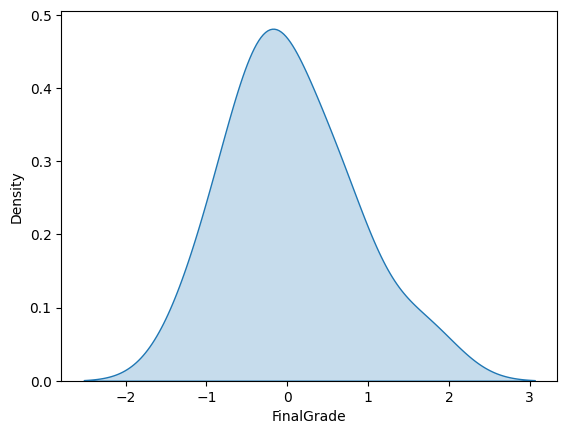

In [1167]:
sns.kdeplot(test_residuals,fill=True)

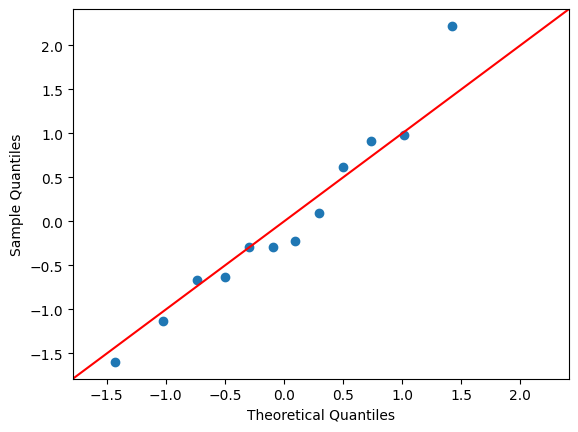

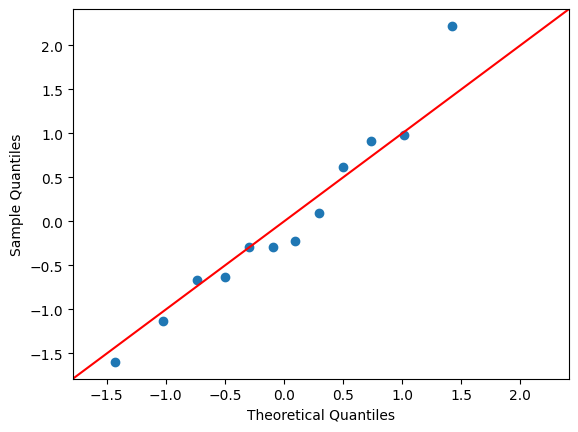

In [1168]:
sm.qqplot(test_residuals,line="45",fit=True)

In [1169]:
train_residuals=y_train-y_train_pred

<Axes: xlabel='FinalGrade', ylabel='Density'>

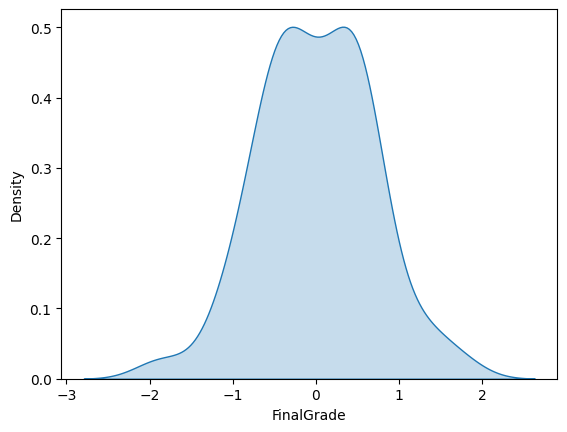

In [1004]:
sns.kdeplot(train_residuals,fill=True)

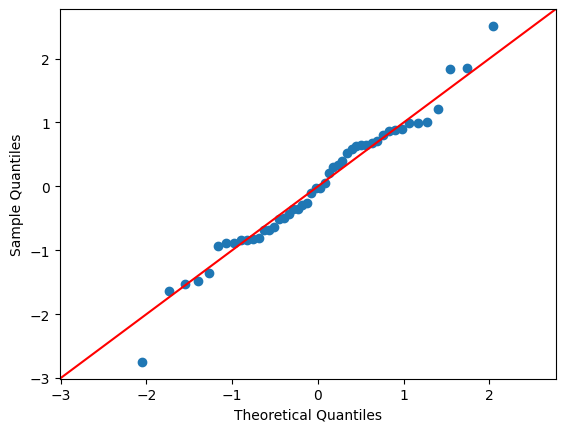

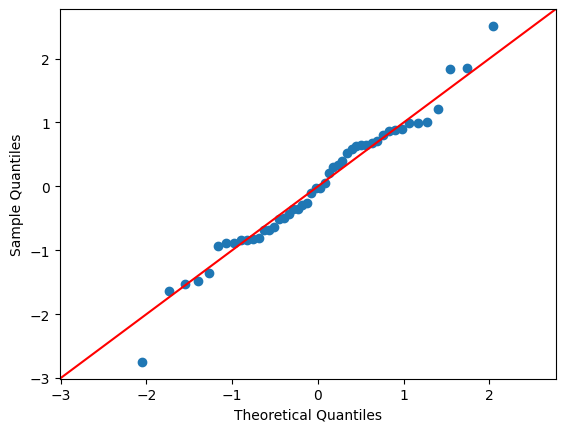

In [1005]:
sm.qqplot(train_residuals,line="45",fit=True)

In [1170]:
train_residuals.skew()

-0.04131628583072891

In [1171]:
df.columns

Index(['Gender', 'AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade',
       'ExtracurricularActivities', 'ParentalSupport', 'FinalGrade'],
      dtype='object')

## Homoscedasticity Using Testing Data

<Axes: ylabel='FinalGrade'>

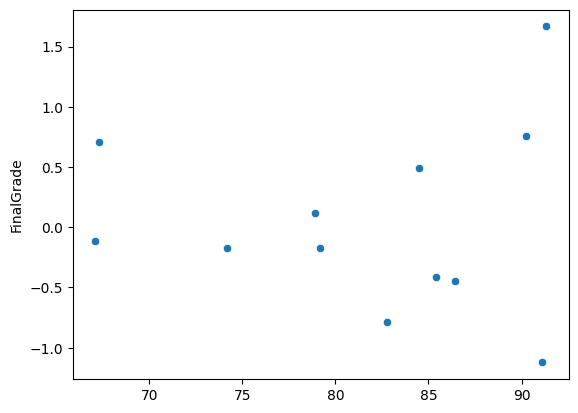

In [1172]:
sns.scatterplot(y=test_residuals,x=y_test_pred)

## Homoscedasticity Using Traning Data

<Axes: ylabel='FinalGrade'>

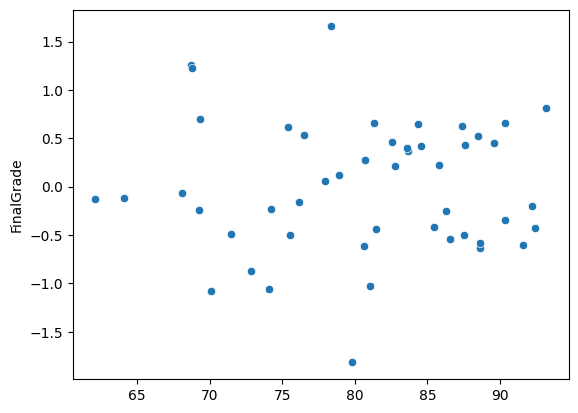

In [1173]:
sns.scatterplot(y=train_residuals,x=y_train_pred)

# Save Model

In [1174]:
with open ("Std_Perf_Pred.pkl","wb") as f:
    pickle.dump(lin_reg,f)

In [1176]:
columns_data={
          "Gender":{"Male":1, "Female":0},
         "ParentalSupport":{'High':2,'Medium':1, 'Low':0}
             }
with open ("Std_Perf_Pred_Columns_data.json","w") as f:
    json.dump(columns_data,f)

In [616]:
# with open ("Std_Perf_Pred_AttendanceRate_lambda.pkl","wb") as f:
#     pickle.dump(AttendanceRate_lambda,f)

In [ ]:
#used np.sqrt on feature AAttendanceRate